In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

Score over time: 0.9475
Final Q-Table Values
[[8.75451693e-01 2.26141961e-02 2.80131284e-02 1.92331100e-02]
 [2.91363113e-03 1.77673630e-02 3.15130536e-04 1.81308276e-02]
 [1.47356818e-02 1.70328957e-03 1.11189610e-02 3.11663809e-03]
 [3.86104893e-05 1.62770347e-03 2.44155520e-04 1.58631731e-03]
 [9.03116588e-01 1.83464222e-02 0.00000000e+00 4.77246796e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00897014e-02 2.51716343e-02 1.44931292e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.15381270e-01 2.41792649e-02]
 [1.58281427e-03 9.34910268e-01 9.50086828e-04 2.40362336e-03]
 [9.86135017e-01 0.00000000e+00 0.00000000e+00 9.51653145e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.52737117e-04 0.00000000e+00 8.13930724e-01 1.33193821e-03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [0.000000

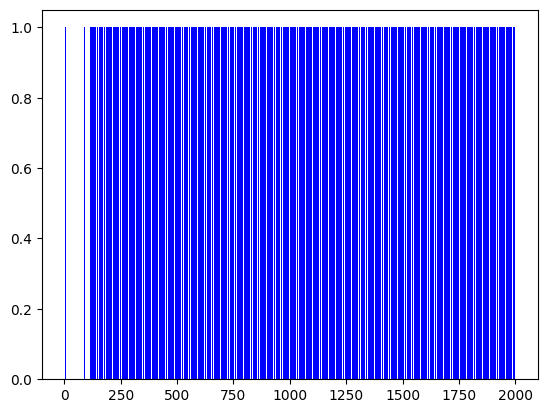

In [6]:
env = gym.make('FrozenLake-v0')


learning_rate = .85
dis = .99
num_episodes = 2000

Q = np.zeros([env.observation_space.n, env.action_space.n])
rList = []

for i in range(num_episodes):
    env.seed(1314)
    state = env.reset()
    rAll = 0
    done = False
    
    while not done:
        # add decaying-random noise
        # standard normal random, (1 x num_of_actions) array
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i + 1))
        new_state, reward, done, _ = env.step(action)
        Q[state, action] = (1-learning_rate) * Q[state, action] + learning_rate * (reward + dis * np.max(Q[new_state, :]))
        state = new_state
        
        rAll += reward
    rList.append(rAll)
    
print("Score over time: " + str(sum(rList)/num_episodes))
print("Final Q-Table Values")
print(Q)    
plt.bar(range(len(rList)), rList, color='blue')
plt.show()